In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../data/train_xy.csv')

In [3]:
test = pd.read_csv('../data/train_x.csv')

In [4]:
print(train.shape)
print(test.shape)

(15000, 160)
(10000, 159)


In [5]:
train_x = train.drop(['y'],axis=1)

In [6]:
train_test = pd.concat([train_x,test])
train_test.shape

(25000, 159)

In [7]:
train_test.head()

,cust_id,cust_group,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157
0,110000,group_3,0.354167,0.604988,-99,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,3,-99
1,110001,group_3,0.125000,0.012058,-99,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,2
2,110002,group_3,0.333333,0.565979,0,0,0,0,0,0,...,1,1,2,1,1,1,1,1,2,2
3,110003,group_3,0.208333,0.316209,0,0,0,0,1,1,...,2,1,1,1,1,1,1,1,2,4
4,110004,group_3,0.208333,0.008061,-99,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,1


In [8]:
#缺失值统计
number = []
count = 0
for i in range(2,159):
    print(i)
    for j in range(25000):
        if train_test.iloc[j,i] == -99:
            count = count + 1
    number.append(count)
    count = 0

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159


IndexError: single positional indexer is out-of-bounds

In [18]:
number

[0,
 0,
 12144,
 12144,
 12144,
 12144,
 12144,
 12144,
 11866,
 11866,
 11866,
 11866,
 11866,
 11866,
 12144,
 12144,
 12144,
 12144,
 12144,
 12144,
 11866,
 11866,
 11866,
 11866,
 12144,
 12144,
 12144,
 12144,
 12144,
 12144,
 11866,
 11866,
 11866,
 11866,
 11866,
 11866,
 11866,
 11866,
 343,
 343,
 343,
 343,
 343,
 343,
 343,
 343,
 341,
 362,
 341,
 341,
 341,
 341,
 341,
 341,
 341,
 341,
 341,
 362,
 341,
 341,
 341,
 341,
 341,
 341,
 341,
 341,
 341,
 341,
 341,
 341,
 341,
 341,
 341,
 341,
 341,
 341,
 341,
 362,
 342,
 5,
 350,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 167,
 1263,
 24631,
 18127,
 24631,
 5160,
 0,
 362,
 362,
 362,
 362,
 362,
 24998,
 24995,
 24976,
 24954,
 24984,
 24881,
 24994,
 24995,
 24995,
 24994,
 24998,
 24975,
 24999,
 24995,
 24922,
 24994,
 24993,
 24993,
 24984,
 24952,
 24970,
 24982,
 24983,
 24885,
 24999,
 24995,
 24996,
 24995,
 24997,
 24995,
 24975,
 24998,
 24928,
 24998,
 24989,
 24996,
 24999,
 16,
 17486,
 17502,
 17971,
 75,


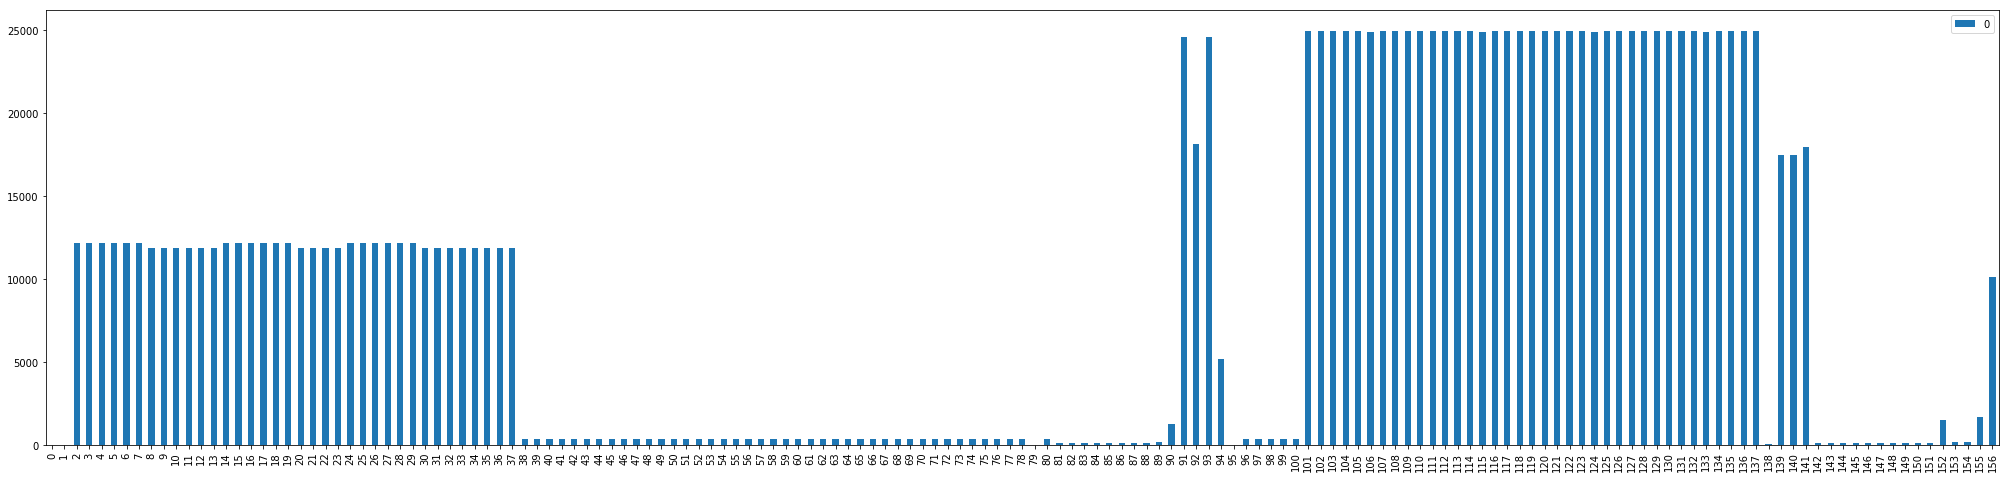

In [17]:
nu = pd.DataFrame(number)
nu.plot.bar(figsize=(35,8))

In [72]:
train_drop_col = train.drop(['x_92', 'x_94', 'x_102', 'x_103', 'x_104', 'x_105', 'x_106', 'x_107', 'x_108', 'x_109', 'x_110', 'x_111', 'x_112', 'x_113', 'x_114', 'x_115', 'x_116', 'x_117', 'x_118', 'x_119', 'x_120', 'x_121', 'x_122', 'x_123', 'x_124', 'x_125', 'x_126', 'x_127', 'x_128', 'x_129', 'x_130', 'x_131', 'x_132', 'x_133', 'x_134', 'x_135', 'x_136', 'x_137', 'x_138'],axis=1)

In [66]:
train_drop_col.shape

(15000, 121)

In [46]:
train_drop_col.columns.values

array(['cust_id', 'cust_group', 'y', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5',
       'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14',
       'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22',
       'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30',
       'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38',
       'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46',
       'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54',
       'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62',
       'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70',
       'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78',
       'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86',
       'x_87', 'x_88', 'x_89', 'x_90', 'x_91', 'x_93', 'x_95', 'x_96',
       'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_139', 'x_140',
       'x_141', 'x_142', 'x_143', 'x_144', 'x_145', 'x_146', 'x_147',
      

In [21]:
test_drop_col = test.drop(['x_92', 'x_94', 'x_102', 'x_103', 'x_104', 'x_105', 'x_106', 'x_107', 'x_108', 'x_109', 'x_110', 'x_111', 'x_112', 'x_113', 'x_114', 'x_115', 'x_116', 'x_117', 'x_118', 'x_119', 'x_120', 'x_121', 'x_122', 'x_123', 'x_124', 'x_125', 'x_126', 'x_127', 'x_128', 'x_129', 'x_130', 'x_131', 'x_132', 'x_133', 'x_134', 'x_135', 'x_136', 'x_137', 'x_138'],axis=1)

In [22]:
test_drop_col.shape

(10000, 120)

In [100]:
miss_all = []
for i in range(39,92):
    col = 'x'+'_'+str(i)
    miss = train_drop_col[train_drop_col[col]== -99].index.values
    print(len(miss))
    miss_all.append(miss)

128
128
128
128
128
128
128
128
128
149
128
128
128
128
128
128
128
128
128
149
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
149
128
0
146
46
46
46
46
46
46
46
46
77
677


In [130]:
miss_all1 = []
for i in range(97,101):
    col = 'x'+'_'+str(i)
    miss = train_drop_col[train_drop_col[col]== -99].index.values
    print(len(miss))
    miss_all1.append(miss)

149
149
149
149


In [131]:
miss_all2 = []
for i in range(143,156):
    col = 'x'+'_'+str(i)
    miss = train_drop_col[train_drop_col[col]== -99].index.values
    print(len(miss))
    miss_all2.append(miss)

46
46
46
46
46
46
46
46
46
46
475
77
77


In [132]:
con1 = miss_all1[0]
count = 0
for i in range(1,4):
    con1 = np.concatenate((con1,miss_all1[i]),axis = 0)    
drop_row1 = np.unique(con1)

In [133]:
con2 = miss_all2[0]
count = 0
for i in range(1,13):
    con2 = np.concatenate((con2,miss_all2[i]),axis = 0)    
drop_row2 = np.unique(con2)

In [127]:
con = miss_all[0]
count = 0
for i in range(1,53):
    con = np.concatenate((con,miss_all[i]),axis = 0)    
drop_row = np.unique(con)

In [134]:
print(drop_row.shape)
print(drop_row1.shape)
print(drop_row2.shape)

(966,)
(149,)
(572,)


In [135]:
drop_row_con = np.concatenate((drop_row,drop_row1,drop_row2),axis = 0) 
drop_row_all = np.unique(drop_row_con)

print(drop_row_all.shape)

(1398,)


In [136]:
train_drop_col_row = train_drop_col.drop(drop_row_all)
print(train_drop_col.shape)
print(train_drop_col_row.shape)

(15000, 121)
(13602, 121)


In [144]:
train_drop_col_row.head()

,cust_id,cust_group,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157
0,110000,group_3,0,0.354167,0.604988,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,3,-99
1,110001,group_3,0,0.125000,0.012058,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,2
2,110002,group_3,0,0.333333,0.565979,0,0,0,0,0,...,1,1,2,1,1,1,1,1,2,2
3,110003,group_3,0,0.208333,0.316209,0,0,0,0,1,...,2,1,1,1,1,1,1,1,2,4
4,110004,group_3,0,0.208333,0.008061,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,1


In [149]:
#缺失值统计
column = ['x_1', 'x_2', 'x_3', 'x_4', 'x_5',
       'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14',
       'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22',
       'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30',
       'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38',
       'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46',
       'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54',
       'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62',
       'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70',
       'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78',
       'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86',
       'x_87', 'x_88', 'x_89', 'x_90', 'x_91', 'x_93', 'x_95', 'x_96',
       'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_139', 'x_140',
       'x_141', 'x_142', 'x_143', 'x_144', 'x_145', 'x_146', 'x_147',
       'x_148', 'x_149', 'x_150', 'x_151', 'x_152', 'x_153', 'x_154',
       'x_155', 'x_156', 'x_157']
number1 = []
count = 0
for i in range(3,121):
    print(i)
    for j in range(13602):
        if train_drop_col_row.iloc[j,i] == -99:
            count = count + 1
    number1.append(count)
    count = 0

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120


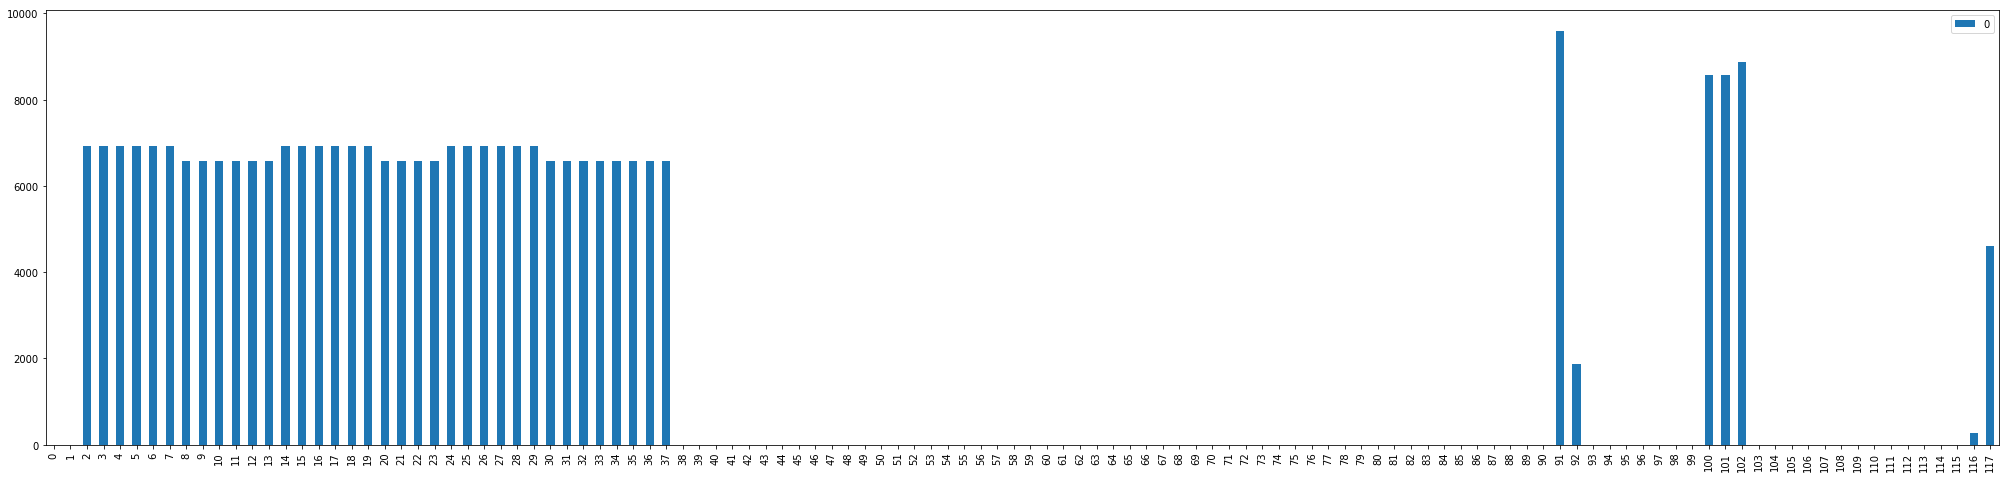

In [150]:
nu1 = pd.DataFrame(number1)
nu1.plot.bar(figsize=(35,8))

In [151]:
miss_all_test = []
for i in range(39,92):
    col = 'x'+'_'+str(i)
    miss = test_drop_col[test_drop_col[col]== -99].index.values
    print(len(miss))
    miss_all_test.append(miss)

215
215
215
215
215
215
215
215
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
213
214
5
204
29
29
29
29
29
29
29
29
90
586


In [152]:
miss_all_test1 = []
for i in range(97,101):
    col = 'x'+'_'+str(i)
    miss = test_drop_col[test_drop_col[col]== -99].index.values
    print(len(miss))
    miss_all_test1.append(miss)

213
213
213
213


In [153]:
miss_all_test2 = []
for i in range(143,156):
    col = 'x'+'_'+str(i)
    miss = test_drop_col[test_drop_col[col]== -99].index.values
    print(len(miss))
    miss_all_test2.append(miss)

29
29
29
29
29
29
29
29
29
29
1031
90
90


In [154]:
con = miss_all_test[0]
count = 0
for i in range(1,53):
    con = np.concatenate((con,miss_all_test[i]),axis = 0)    
drop_row_test = np.unique(con)

In [155]:
con1 = miss_all_test1[0]
count = 0
for i in range(1,4):
    con1 = np.concatenate((con1,miss_all_test1[i]),axis = 0)    
drop_row_test1 = np.unique(con1)

In [156]:
con2 = miss_all_test2[0]
count = 0
for i in range(1,13):
    con2 = np.concatenate((con2,miss_all_test2[i]),axis = 0)    
drop_row_test2 = np.unique(con2)

In [157]:
print(drop_row_test.shape)
print(drop_row_test1.shape)
print(drop_row_test2.shape)

(997,)
(213,)
(1143,)


In [158]:
drop_row_con_test = np.concatenate((drop_row_test,drop_row_test1,drop_row_test2),axis = 0) 
drop_row_all_test = np.unique(drop_row_con_test)

print(drop_row_all_test.shape)

(1878,)


In [159]:
test_drop_col_row = test_drop_col.drop(drop_row_all_test)
print(test_drop_col.shape)
print(test_drop_col_row.shape)

(10000, 120)
(8122, 120)


In [160]:
test_drop_col_row.head()

,cust_id,cust_group,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157
0,100000,group_3,0.125000,0.659675,0,1,1,0,3,3,...,1,1,1,1,1,1,1,1,2,2
1,100001,group_3,0.250000,0.657454,0,0,0,0,0,0,...,1,1,4,1,1,1,1,1,2,-99
2,100002,group_3,0.604167,0.825764,0,0,0,0,3,3,...,1,1,1,1,1,1,1,1,2,-99
3,100003,group_3,0.312500,0.473441,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
4,100004,group_3,0.458333,0.344635,-99,-99,-99,-99,-99,-99,...,1,1,2,1,1,1,1,1,2,1


In [161]:
#缺失值统计
column = ['x_1', 'x_2', 'x_3', 'x_4', 'x_5',
       'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14',
       'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22',
       'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30',
       'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38',
       'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46',
       'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54',
       'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62',
       'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70',
       'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78',
       'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86',
       'x_87', 'x_88', 'x_89', 'x_90', 'x_91', 'x_93', 'x_95', 'x_96',
       'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_139', 'x_140',
       'x_141', 'x_142', 'x_143', 'x_144', 'x_145', 'x_146', 'x_147',
       'x_148', 'x_149', 'x_150', 'x_151', 'x_152', 'x_153', 'x_154',
       'x_155', 'x_156', 'x_157']
number2 = []
count = 0
for i in range(2,120):
    print(i)
    for j in range(8122):
        if train_drop_col_row.iloc[j,i] == -99:
            count = count + 1
    number2.append(count)
    count = 0

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


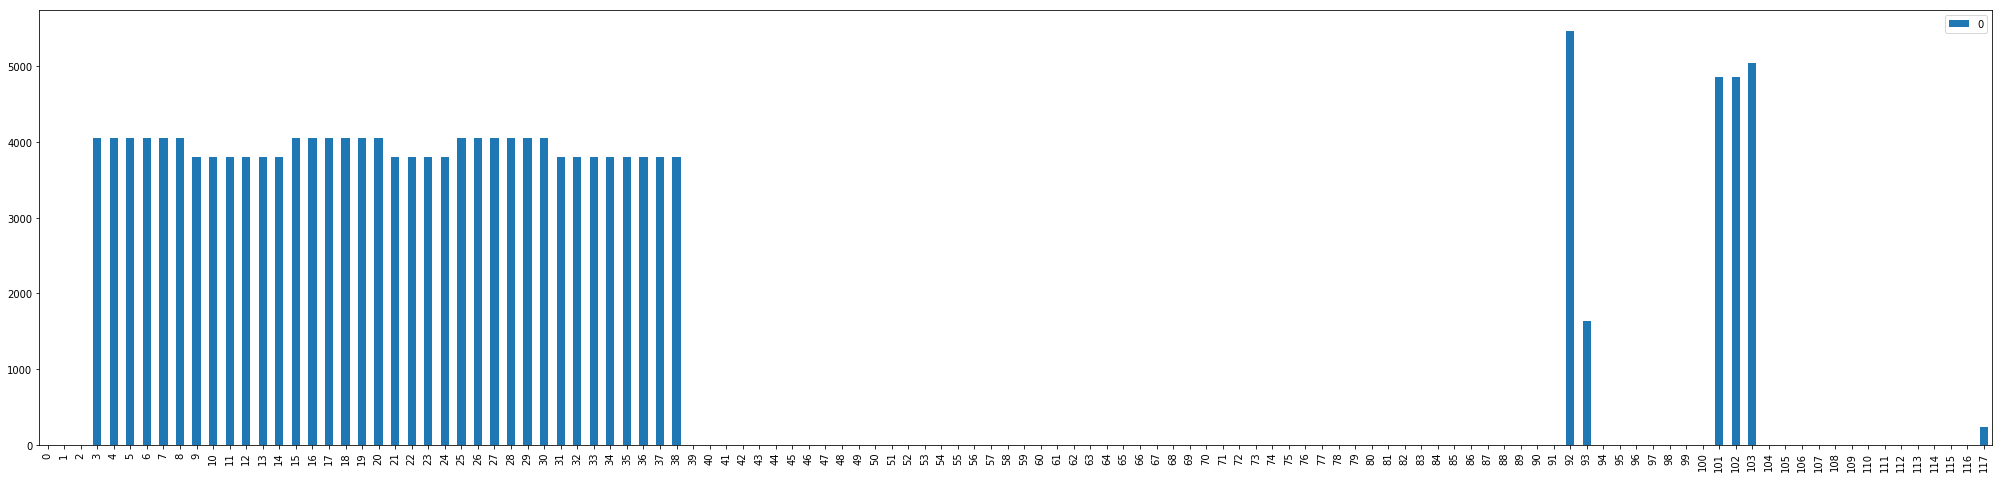

In [162]:
nu2 = pd.DataFrame(number2)
nu2.plot.bar(figsize=(35,8))

In [163]:
train_drop_col_row.to_csv('../data/train_drop_col_row.csv',index=False)

In [165]:
test_drop_col_row.to_csv('../data/train_x_drop_col_row.csv',index=False)

In [5]:
idx_0 = train[train.y == 0].index
idx_1 = train[train.y == 1].index
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])
print(nb_0)
print(nb_1)
idx_list_0 = list(idx_0)
idx_list_1 = list(idx_1)
train_x0 = train.loc[idx_list_0]
train_x1 = train.loc[idx_list_1]
print(train_x0.shape)
print(train_x1.shape)

14309
691
(14309, 160)
(691, 160)


In [6]:
train_x1

,cust_id,cust_group,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157
46,110046,group_3,1,0.437500,0.743508,0,0,0,0,0,...,1,1,1,1,1,1,1,1,2,4
505,110505,group_3,1,0.229167,0.769781,0,0,0,0,1,...,1,1,1,1,1,1,1,1,2,2
938,110938,group_3,1,0.250000,0.860082,0,0,0,0,5,...,1,1,2,1,1,1,1,1,2,2
1401,111401,group_3,1,0.104167,0.643934,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,4
1889,111889,group_3,1,0.708333,0.699773,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,1,3
2152,112152,group_3,1,0.479167,0.559499,0,0,0,0,0,...,1,1,1,1,1,1,1,1,2,3
2191,112191,group_3,1,0.208333,0.612494,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,-99
2871,112871,group_3,1,0.270833,0.650262,0,0,0,0,6,...,1,1,1,1,1,1,1,1,2,3
3107,113107,group_3,1,0.270833,0.477204,0,3,3,0,0,...,1,1,1,1,1,1,1,1,1,10
3386,113386,group_3,1,0.083333,0.442955,0,0,0,0,3,...,1,1,1,1,1,1,1,1,2,-99


In [7]:
train_x0

,cust_id,cust_group,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157
0,110000,group_3,0,0.354167,0.604988,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,3,-99
1,110001,group_3,0,0.125000,0.012058,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,2
2,110002,group_3,0,0.333333,0.565979,0,0,0,0,0,...,1,1,2,1,1,1,1,1,2,2
3,110003,group_3,0,0.208333,0.316209,0,0,0,0,1,...,2,1,1,1,1,1,1,1,2,4
4,110004,group_3,0,0.208333,0.008061,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,1
5,110005,group_3,0,0.250000,0.609981,-99,-99,-99,-99,-99,...,1,1,1,1,1,-99,1,1,2,-99
6,110006,group_3,0,0.208333,0.531213,0,0,0,0,3,...,1,1,1,1,1,1,1,1,2,4
7,110007,group_3,0,0.395833,0.781657,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,3,2
8,110008,group_3,0,0.208333,0.398122,0,0,0,0,2,...,1,1,1,1,1,1,1,1,2,3
9,110009,group_3,0,0.270833,0.489279,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,1,-99


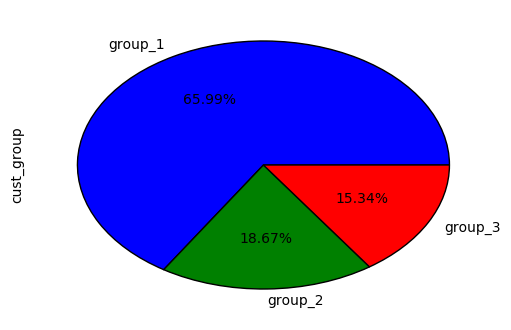

In [8]:
train_x1['cust_group'].value_counts().plot.pie(autopct = '%1.2f%%')

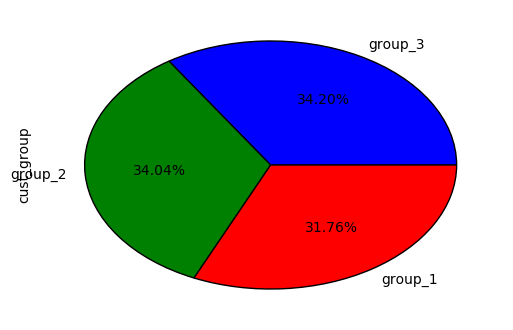

In [9]:
train_x0['cust_group'].value_counts().plot.pie(autopct = '%1.2f%%')

In [10]:
count = []
number = 0
for i in range(691):
    for j in range(160):
        if train_x1.iloc[i,j] == -99:
            number = number + 1
    count.append(number)
    number = 0

In [11]:
aa = pd.DataFrame(count)

In [12]:
aa.columns = ['a']

In [13]:
count1 = []
number = 0
for i in range(14309):
    for j in range(160):
        if train_x0.iloc[i,j] == -99:
            number = number + 1
    count1.append(number)
    number = 0

In [14]:
bb = pd.DataFrame(count1)

In [15]:
bb.columns = ['b']

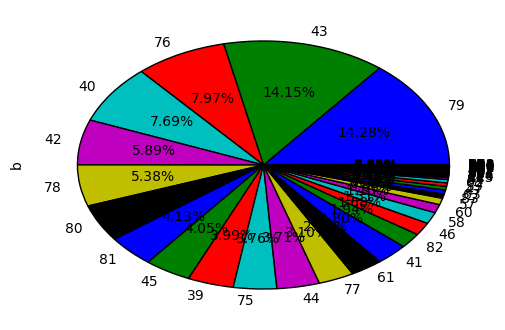

In [16]:
bb['b'].value_counts().plot.pie(autopct = '%1.2f%%')

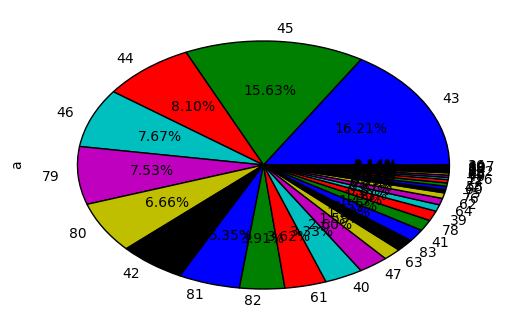

In [17]:
aa['a'].value_counts().plot.pie(autopct = '%1.2f%%')

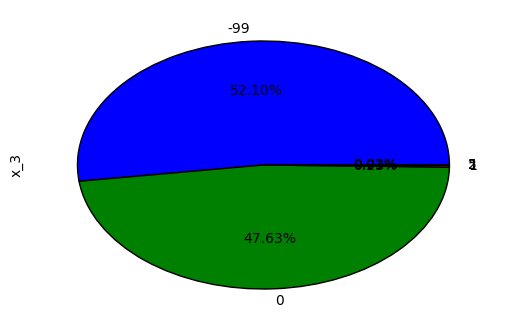

In [18]:
train_x0['x_3'].value_counts().plot.pie(autopct = '%1.2f%%')

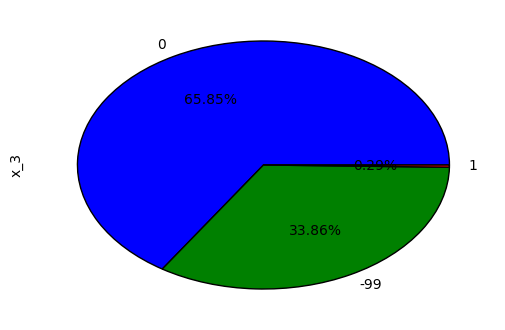

In [19]:
train_x1['x_3'].value_counts().plot.pie(autopct = '%1.2f%%')

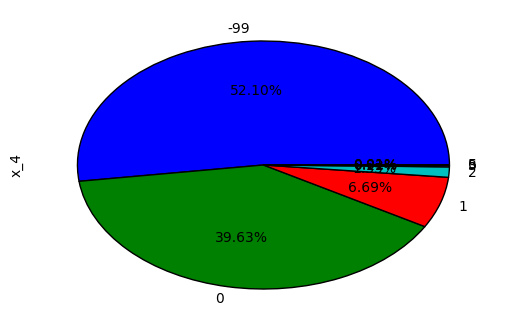

In [20]:
train_x0['x_4'].value_counts().plot.pie(autopct = '%1.2f%%')

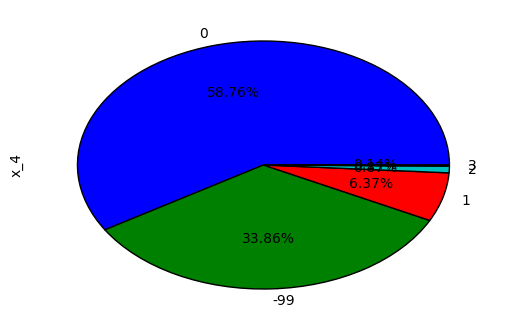

In [21]:
train_x1['x_4'].value_counts().plot.pie(autopct = '%1.2f%%')

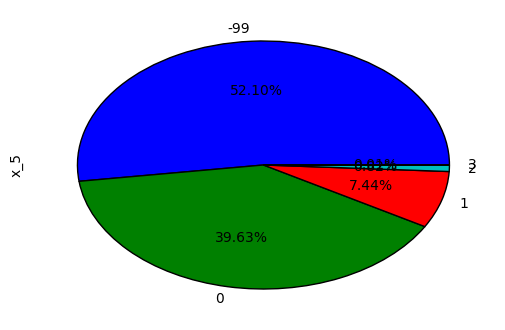

In [22]:
train_x0['x_5'].value_counts().plot.pie(autopct = '%1.2f%%')

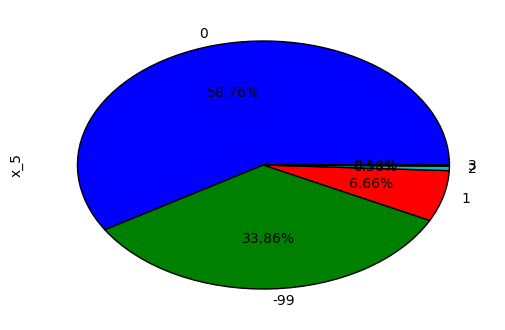

In [23]:
train_x1['x_5'].value_counts().plot.pie(autopct = '%1.2f%%')

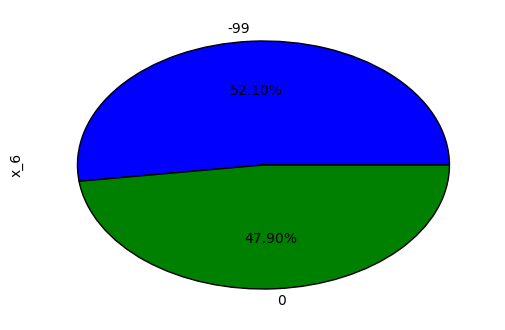

In [24]:
train_x0['x_6'].value_counts().plot.pie(autopct = '%1.2f%%')

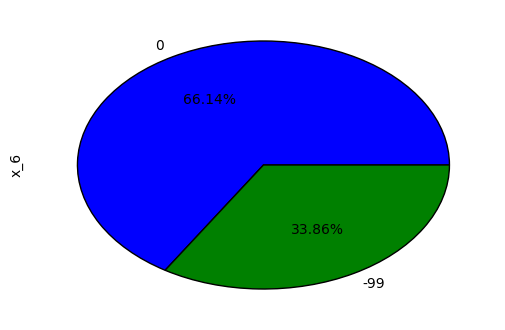

In [25]:
train_x1['x_6'].value_counts().plot.pie(autopct = '%1.2f%%')

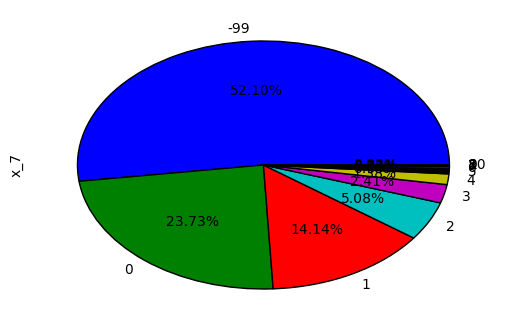

In [26]:
train_x0['x_7'].value_counts().plot.pie(autopct = '%1.2f%%')

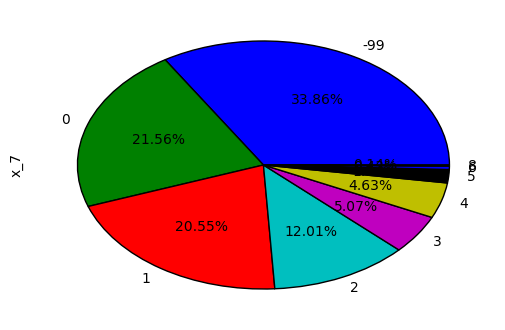

In [27]:
train_x1['x_7'].value_counts().plot.pie(autopct = '%1.2f%%')

In [50]:
from scipy import stats
def woe_single(DF,Y,X):
    if X.nunique()>11:
        r = 0
        bad=Y.sum()      #坏客户数(假设因变量列为1的是坏客户)
        good=Y.count()-bad  #好客户数
        n=5
        while np.abs(r) < 1:
            d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n,duplicates='drop')})
            d2 = d1.groupby('Bucket', as_index = False)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1
        d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
        d3['min']=d2.min().X    
        d3['max'] = d2.max().X
        d3['sum'] = d2.sum().Y
        d3['total'] = d2.count().Y
        d3['bad_rate'] = d2.mean().Y
        d3['group_rate']=d3['total']/(bad+good)
        d3['woe']=np.log((d3['bad_rate']/(1-d3['bad_rate']))/(bad/good))
        d3['iv']=(d3['sum']/bad-((d3['total']-d3['sum'])/good))*d3['woe']
        iv=d3['iv'].sum()
        if iv!=0.0 and len(d2)>1:
            d3['iv_sum']=iv
            woe=list(d3['woe'].round(6))
            cut=list(d3['min'].round(6))
            cut1=list(d3['max'].round(6))
            cut.append(cut1[-1]+1)
            x_woe=pd.cut(X,cut,right=False,labels=woe)
            return  d3,cut,woe,iv,x_woe
        else:
            dn1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.cut(X, 100)})
            dn2 = dn1.groupby('Bucket', as_index = False)
            dn3 = pd.DataFrame(dn2.X.min(), columns = ['min'])
            dn3['min']=dn2.min().X    
            dn3['max'] = dn2.max().X
            dn3['sum'] = dn2.sum().Y
            dn3['total'] = dn2.count().Y
            while (1):
                    if  (len(dn3)>4):
                        dn3_min_index = dn3[dn3.total == min(dn3.total)].index.values[0]
                        if (dn3_min_index!=0):    #最小值非第一行的情况
                            dn3.iloc[dn3_min_index-1, 1] =dn3.iloc[dn3_min_index, 1] 
                            dn3.iloc[dn3_min_index-1, 2] = dn3.iloc[dn3_min_index, 2] +dn3.iloc[dn3_min_index-1, 2]
                            dn3.iloc[dn3_min_index-1, 3] = dn3.iloc[dn3_min_index, 3] +dn3.iloc[dn3_min_index-1, 3]
                            dn3=dn3.drop([dn3_min_index])
                            dn3= dn3.reset_index(drop=True)
                        else:    #最小值是第一行的情况
                            dn3.iloc[dn3_min_index+1, 0] =dn3.iloc[dn3_min_index, 0] 
                            dn3.iloc[dn3_min_index+1, 2] = dn3.iloc[dn3_min_index, 2] +dn3.iloc[dn3_min_index+1, 2]
                            dn3.iloc[dn3_min_index+1, 3] = dn3.iloc[dn3_min_index, 3] +dn3.iloc[dn3_min_index+1, 3]
                            dn3=dn3.drop([dn3_min_index])
                            dn3= dn3.reset_index(drop=True)
                    else:
                        break
            dn3['bad_rate'] =dn3['sum']/dn3['total']
            dn3['group_rate']=dn3['total']/(bad+good)
            dn3['woe']=np.log((dn3['bad_rate']/(1-dn3['bad_rate']))/(bad/good))
            dn3['iv']=(dn3['sum']/bad-((dn3['total']-dn3['sum'])/good))*dn3['woe']
            
            iv=dn3['iv'].sum()
            dn3['iv_sum']=iv
            woe=list(dn3['woe'].round(6)) 
            cut=list(dn3['min'].round(6))
            cut1=list(dn3['max'].round(6))
            cut.append(cut1[-1]+1)
            x_woe=pd.cut(X,cut,right=False,labels=woe)
            return  dn3,cut,woe,iv,x_woe
    else : 
        bad=Y.sum()      #坏客户数
        good=Y.count()-bad  #好客户数
        d1 = pd.DataFrame({"X": X, "Y": Y})
        d2 = d1.groupby('X', as_index =True)
        d3 = pd.DataFrame()
        
        d3['sum'] = d2.sum().Y
        d3['total'] = d2.count().Y
        for c in range(d3.shape[0])[::-1]:
            if ((d3.iloc[c,1]-d3.iloc[c,0])==0) or (d3.iloc[c,0]==0):
                d3.iloc[c-1,0]=d3.iloc[c-1,0]+d3.iloc[c,0]
                d3.iloc[c-1,1]=d3.iloc[c-1,1]+d3.iloc[c,1]
                d3.drop(d3.index[c],inplace=True)
            else:
                continue
        
        d3['min']=d3.index  
        d3['max'] = d3.index
        d3['bad_rate'] =d3['sum']/d3['total']
        d3['group_rate']=d3['total']/(bad+good)
        d3['woe']=np.log((d3['bad_rate']/(1-d3['bad_rate']))/(bad/good))
        d3['iv']=(d3['sum']/bad-((d3['total']-d3['sum'])/good))*d3['woe']
        iv=d3['iv'].sum()
        d3['iv_sum']=iv
        d3=d3[['min','max','sum','total','bad_rate','group_rate','woe','iv','iv_sum']]
        
        
        woe=list(d3['woe'].round(6))
        cut=list(d3.index)
        x_woe=X.replace(cut,woe)
        return d3,cut,woe,iv,x_woe

In [37]:
train.head()

,cust_id,cust_group,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157
0,110000,group_3,0,0.354167,0.604988,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,3,-99
1,110001,group_3,0,0.125000,0.012058,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,2
2,110002,group_3,0,0.333333,0.565979,0,0,0,0,0,...,1,1,2,1,1,1,1,1,2,2
3,110003,group_3,0,0.208333,0.316209,0,0,0,0,1,...,2,1,1,1,1,1,1,1,2,4
4,110004,group_3,0,0.208333,0.008061,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,1


In [47]:
train['x_81']

0        0.969147
1        0.905626
2        0.867514
3        0.907441
4        0.865699
5        0.967332
6        0.970962
7        0.571688
8        0.887477
9        0.865699
10       0.927405
11       0.878403
12       0.958258
13       0.927405
14       0.936479
15       0.903811
16       0.936479
17       0.900181
18       0.887477
19       0.916515
20       0.925590
21       0.887477
22       0.923775
23       0.931034
24       0.967332
25       0.885662
26       0.911071
27       0.918330
28       0.874773
29       0.958258
           ...   
14970    0.911071
14971    0.920145
14972    0.921960
14973    0.509982
14974    0.865699
14975    0.945554
14976    0.896552
14977    0.952813
14978    0.865699
14979    0.967332
14980    0.542650
14981    0.963702
14982    0.882033
14983    0.588022
14984    0.891107
14985    0.932849
14986    0.927405
14987    0.871143
14988    0.945554
14989    0.872958
14990    0.880218
14991    0.956443
14992    0.896552
14993    0.889292
14994    0

In [40]:
iv_all = []
for i in range(1,158):
    print(i)
    col = 'x'+'_'+str(i)
    X = train[col]
    iv =  woe_single(train,train.y,X)[3]
    iv_all.append(iv)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81


C:\Program Files\Anaconda3\lib\site-packages\pandas\core\reshape\tile.py:227: RuntimeWarning: invalid value encountered in less
  if (np.diff(bins) < 0).any():


ValueError: Bin edges must be unique: array([-99.      ,        nan,        nan,   0.502722,   2.      ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [49]:
woe_single(train,train.y,train.x_81)[3]

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\reshape\tile.py:227: RuntimeWarning: invalid value encountered in less
  if (np.diff(bins) < 0).any():


ValueError: Bin edges must be unique: array([-99.      ,        nan,        nan,   0.502722,   2.      ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [36]:
a.shape

(15000,)

In [32]:
woe_single(train,train.y,train.x_3)[0]

,min,max,sum,total,bad_rate,group_rate,woe,iv,iv_sum
X,,,,,,,,,
-99,-99,-99,234,7689,0.030433,0.512600,-0.430815,0.078564,0.137551
0,0,0,455,7271,0.062577,0.484733,0.323774,0.058966,0.137551
1,1,1,2,40,0.050000,0.002667,0.086065,0.000021,0.137551
